In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy


In [2]:
def compute_entropy(sample):
    hist, bin_edges = np.histogram(sample, bins=30, density=True)
    hist = hist[hist > 0]  # Remove zero values
    return entropy(hist)

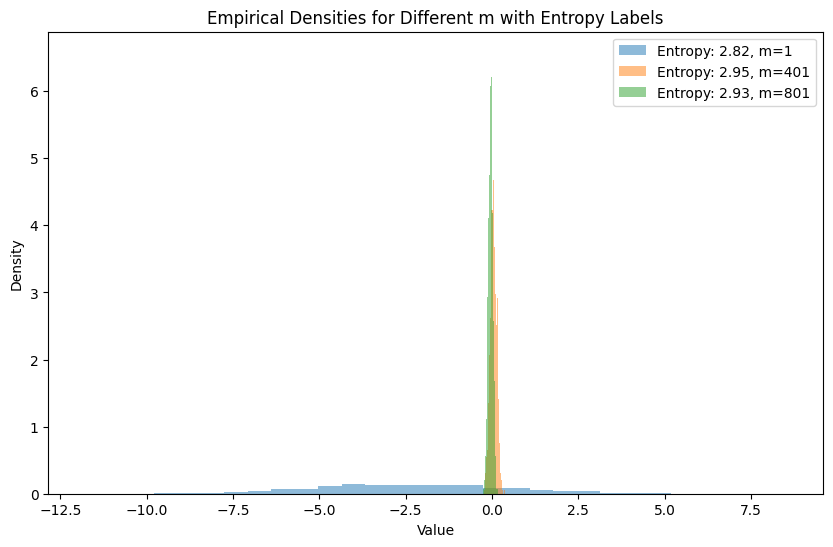

In [12]:
np.random.seed(42)
num_distributions = 2000

n_samples = 1000

m_values = range(1, 1024, 400)

distributions = [np.random.normal(loc=np.random.uniform(-10, 10), scale=np.random.uniform(0.5, 3), size=1000)
                 for _ in range(num_distributions)]

plt.figure(figsize=(10, 6))

for m in m_values:
    samples = np.mean([np.random.choice(dist, size=n_samples) for dist in distributions[:m]], axis=0)
    emp_entropy = compute_entropy(samples)
    
    # Plot the empirical density
    count, bins, ignored = plt.hist(samples, bins=30, density=True, alpha=0.5, label=f'Entropy: {emp_entropy:.2f}, m={m}')
    
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Empirical Densities for Different m with Entropy Labels')
plt.legend()
plt.show()


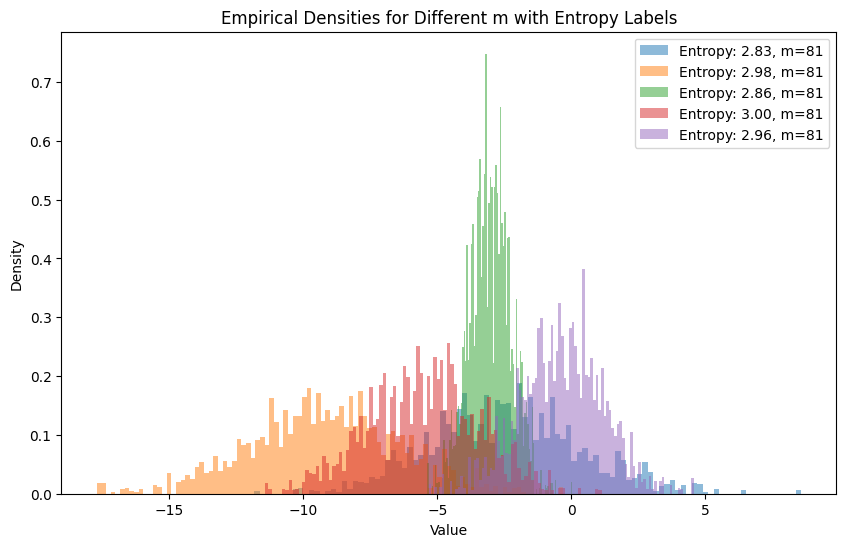

In [8]:
plt.figure(figsize=(10, 6))
n_samples = 10000
m_distributions = 5

for distr in distributions[:m_distributions]:
    samples =np.random.choice(distr, size=n_samples)
    emp_entropy = compute_entropy(samples)
    count, bins, ignored = plt.hist(samples, bins=100, density=True, alpha=0.5, label=f'Entropy: {emp_entropy:.2f}, m={m}')
    
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Empirical Densities for Different m with Entropy Labels')
plt.legend()
plt.show()

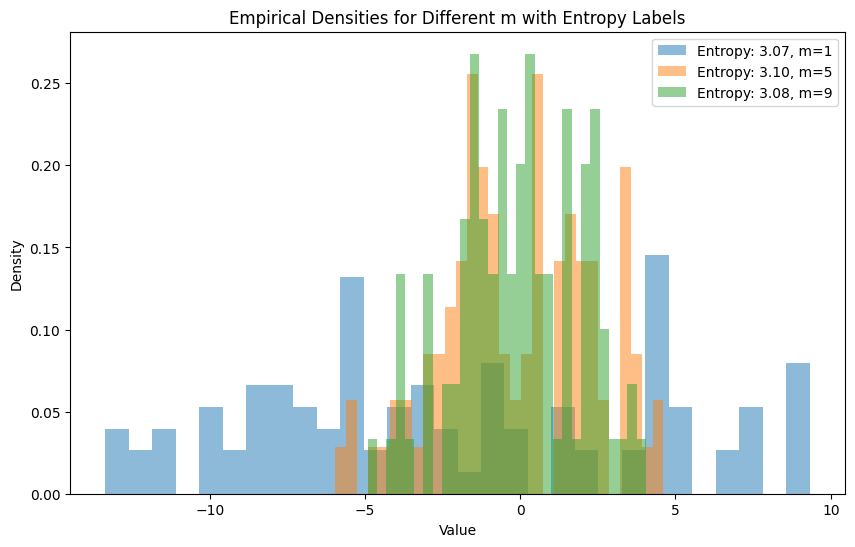

In [14]:
np.random.seed(42)
num_distributions = 200
n_samples = 100
m_values = range(1, 10, 4)

alpha = 0.7  # Степень корреляции
mean = np.random.uniform(-10, 10, size=num_distributions)
std_dev = np.random.uniform(0.5, 3, size=num_distributions)

cov_matrix = np.full((num_distributions, num_distributions), alpha)  # Все элементы коррелированы
np.fill_diagonal(cov_matrix, 1)  # Диагональные элементы = 1 (корреляция с собой)

distributions = [np.random.multivariate_normal(mean, np.diag(std_dev) @ cov_matrix @ np.diag(std_dev)) for _ in range(num_distributions)]

plt.figure(figsize=(10, 6))

for m in m_values:
    samples = np.mean([np.random.choice(dist, size=n_samples) for dist in distributions[:m]], axis=0)
    emp_entropy = compute_entropy(samples)
    
    # Построение эмпирической плотности
    count, bins, ignored = plt.hist(samples, bins=30, density=True, alpha=0.5, label=f'Entropy: {emp_entropy:.2f}, m={m}')
    
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Empirical Densities for Different m with Entropy Labels')
plt.legend()
plt.show()
